In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
ratings = pd.read_pickle('../data//ml-latest-small/ratings_concat.p')
genres = pd.read_pickle('../data/ml-latest-small/genres.p')

# 1 User에 대한 regression

## User profile

* 414번 user가 평점 데이터가 젤 많아서 가져옴

In [4]:
user414 = ratings[ratings['userId'] == 414]
user414

,userId,movieId,rating,timestamp
62294,414,1,4.0,2000-06-19 18:08:47
62295,414,2,3.0,2000-06-21 13:43:01
62296,414,3,4.0,2000-06-19 18:27:58
62297,414,5,2.0,2000-06-19 18:00:47
62298,414,6,3.0,2000-06-20 15:40:42
62299,414,7,3.0,2000-06-19 18:26:10
62300,414,8,3.0,2000-06-21 13:40:49
62301,414,10,3.0,2000-06-20 15:44:23
62302,414,11,5.0,2003-05-05 15:23:25
62303,414,15,2.0,2000-06-20 15:23:31


In [5]:
user414 = user414.merge(genres, left_on='movieId', right_index=True)
user414

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
62294,414,1,4.0,2000-06-19 18:08:47,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
62295,414,2,3.0,2000-06-21 13:43:01,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62296,414,3,4.0,2000-06-19 18:27:58,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
62297,414,5,2.0,2000-06-19 18:00:47,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62298,414,6,3.0,2000-06-20 15:40:42,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
62299,414,7,3.0,2000-06-19 18:26:10,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
62300,414,8,3.0,2000-06-21 13:40:49,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62301,414,10,3.0,2000-06-20 15:44:23,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
62302,414,11,5.0,2003-05-05 15:23:25,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
62303,414,15,2.0,2000-06-20 15:23:31,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
user414[genres.columns]

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
62294,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
62295,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
62296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
62297,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62298,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
62299,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
62300,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62301,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
62302,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
62303,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(user414[genres.columns],
                                                    user414['rating'],
                                                    random_state=4444,
                                                    test_size=.1)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2428, 20)
(270, 20)
(2428,)
(270,)


## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
reg.coef_

array([ 1.04057439, -0.17157941,  0.08928922,  0.68526144, -0.24585761,
       -0.07628477,  0.1831437 ,  0.42961331,  0.29119828,  0.04129603,
        0.18426156, -0.17356652,  0.36509906,  0.0036237 ,  0.22832684,
       -0.01710843,  0.18147785, -0.15695851,  0.47136769,  0.16908934])

In [14]:
reg.intercept_

3.2094256125007234

In [15]:
list(zip(X_train.columns, reg.coef_))

[('(no genres listed)', 1.0405743874992759),
 ('Action', -0.17157941014305705),
 ('Adventure', 0.08928921652583943),
 ('Animation', 0.6852614443472744),
 ('Children', -0.24585760827867242),
 ('Comedy', -0.0762847705745166),
 ('Crime', 0.18314369833355265),
 ('Documentary', 0.4296133135519008),
 ('Drama', 0.2911982804655227),
 ('Fantasy', 0.0412960278087556),
 ('Film-Noir', 0.1842615609987438),
 ('Horror', -0.17356651539029738),
 ('IMAX', 0.36509905565898454),
 ('Musical', 0.0036236989804126324),
 ('Mystery', 0.22832684320361826),
 ('Romance', -0.01710843380846731),
 ('Sci-Fi', 0.18147784580225818),
 ('Thriller', -0.15695850560885005),
 ('War', 0.4713676899744268),
 ('Western', 0.16908934118946095)]

In [16]:
%matplotlib inline

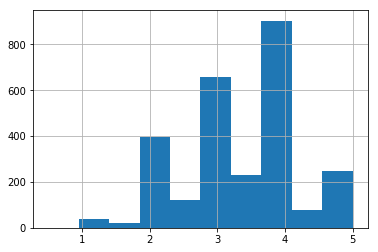

In [17]:
user414['rating'].hist()

* Children genre를 싫어하는 것 같은데 hist를 찍어보자

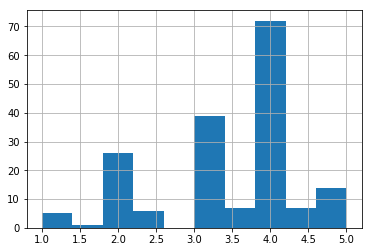

In [18]:
# user414[user414['Children'] == 1]['rating'].hist()
user414.loc[user414['Children']==1, 'rating'].hist() # 위에꺼랑 같은표현

* 반대로 WAR를 좋아하는 것 같은데 HIST

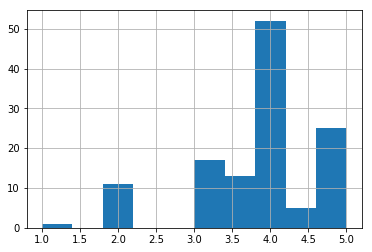

In [19]:
user414.loc[user414['War']==1, 'rating'].hist() # 위에꺼랑 같은표현

## Predict

In [20]:
predict = reg.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
rmse

0.898118614518667

# About all users

## Regression

In [23]:
ratings = ratings.merge(genres, left_on='movieId', right_index=True)
ratings

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
516,5,1,4.0,1996-11-08 06:36:02,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
874,7,1,4.5,2005-01-25 06:52:26,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1434,15,1,2.5,2017-11-13 12:59:30,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1667,17,1,4.5,2011-05-18 05:28:03,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1772,18,1,3.5,2016-02-11 16:56:56,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2274,19,1,4.0,2000-08-08 03:33:57,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3219,21,1,3.5,2014-08-09 21:14:38,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4059,27,1,3.0,2000-07-04 04:34:22,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4879,31,1,5.0,1996-12-13 08:43:36,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train, test = train_test_split(ratings, test_size=0.1, random_state=4444)

In [25]:
train

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
81111,514,597,2.5,2018-08-11 01:01:16,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5362,37,316,5.0,1996-10-13 20:44:02,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
68233,439,5952,4.0,2015-07-15 07:06:51,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30350,212,8961,3.0,2018-04-08 19:48:40,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
36973,249,62081,3.5,2014-11-08 03:05:20,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27057,182,8984,3.0,2005-07-09 03:27:20,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
14542,91,3840,4.0,2005-04-05 16:10:26,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100673,610,109487,3.5,2017-05-03 20:57:21,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
64555,414,48142,3.5,2007-01-03 17:30:28,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
13879,89,96935,5.0,2018-03-07 08:00:52,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [26]:
user_profile_list=[]

for userId in train['userId'].unique():
    user = train[train['userId'] == userId]
    X_train = user[genres.columns]
    y_train = user['rating']
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    user_profile_list.append([reg.intercept_, *reg.coef_]) # * : Flatten 기능

In [27]:
user_profile_list

[[3.2101885072590495,
  0.0,
  -0.09901715230209847,
  0.08095830331546375,
  0.2490723244837358,
  0.43689649758121574,
  0.06119093689434576,
  0.06254135417726056,
  0.3898114927409508,
  0.39308134916211057,
  -0.32090655948883917,
  0.33418878940157903,
  -0.6204871068627577,
  0.2714317166221898,
  0.07412317922168907,
  -0.18157633973690615,
  -0.029567531434258925,
  0.036575500584024034,
  0.2729727424072037,
  -0.07168413080991441,
  0.5611333637429392],
 [3.8602150537634423,
  -4.746203430272544e-15,
  0.12903225806451515,
  -0.16129032258064446,
  0.3118279569892486,
  -0.3369175627240158,
  1.1505376344086027,
  -1.2365591397849454,
  -2.220446049250313e-16,
  -0.07526881720430072,
  -0.3369175627240155,
  4.440892098500626e-16,
  1.6666666666666665,
  1.3763440860215022,
  -0.33691756272401485,
  0.0,
  -3.6881720430107547,
  -0.02150537634408711,
  0.7096774193548374,
  2.7526881720430105,
  0.37634408602150526],
 [3.1333333333333333,
  -2.4980018054066022e-15,
  -0.3666

In [28]:
user_profile = pd.DataFrame(user_profile_list,
                            index=train['userId'].unique(),
                            columns=['intercept', *genres.columns])

In [29]:
user_profile

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
514,3.210189,0.000000e+00,-0.099017,8.095830e-02,2.490723e-01,4.368965e-01,0.061191,6.254135e-02,3.898115e-01,0.393081,...,3.341888e-01,-6.204871e-01,2.714317e-01,7.412318e-02,-1.815763e-01,-2.956753e-02,0.036576,0.272973,-0.071684,0.561133
37,3.860215,-4.746203e-15,0.129032,-1.612903e-01,3.118280e-01,-3.369176e-01,1.150538,-1.236559e+00,-2.220446e-16,-0.075269,...,4.440892e-16,1.666667e+00,1.376344e+00,-3.369176e-01,0.000000e+00,-3.688172e+00,-0.021505,0.709677,2.752688,0.376344
439,3.133333,-2.498002e-15,-0.366667,9.111111e-01,-1.522222e+00,-1.522222e+00,3.255556,5.000000e-01,8.666667e-01,1.366667,...,0.000000e+00,0.000000e+00,-3.555556e-01,0.000000e+00,0.000000e+00,-2.500000e+00,0.500000,1.233333,-0.255556,0.000000
212,3.738551,-2.385512e-01,-0.101870,-5.459778e-02,1.898962e-01,-2.042997e-01,-0.077984,1.144730e-01,-1.110223e-16,0.009222,...,4.612109e-01,-1.515824e-01,-1.681626e-01,1.429424e-01,-6.908591e-02,-9.731180e-02,-0.133740,-0.143279,-0.230396,-0.098990
249,3.678731,0.000000e+00,0.011118,3.103283e-02,4.301801e-01,-3.013626e-01,-0.191691,1.817922e-01,-1.904720e-01,0.289555,...,6.689932e-01,-2.651134e-01,3.458671e-02,7.276508e-02,1.179320e-01,-8.329486e-03,0.109933,-0.190591,0.037684,0.271708
182,3.364977,0.000000e+00,-0.232907,-7.706217e-02,7.032337e-01,-5.452294e-01,-0.039606,2.213971e-01,-1.276674e-01,0.519566,...,4.979085e-01,-2.084263e-02,-4.675662e-01,1.274092e-01,3.089002e-01,-1.181510e-02,-0.145806,-0.266498,0.223977,0.186505
91,2.968610,0.000000e+00,0.194992,1.152551e-01,9.050849e-01,-4.717066e-01,-0.171633,2.117773e-01,5.304373e-01,0.007620,...,-1.114743e+00,5.580310e-01,2.561600e-01,-2.504223e-01,1.824330e-01,-2.279109e-01,0.302723,0.251922,0.252092,0.402726
610,3.666611,0.000000e+00,-0.143846,6.839674e-02,3.377555e-01,-3.074691e-01,0.031195,1.178832e-01,5.271503e-01,0.237634,...,3.496522e-01,-1.442430e-01,-4.914618e-02,2.189068e-01,1.445950e-01,-5.604632e-02,0.074139,-0.140610,0.008970,0.197789
414,3.210859,7.891410e-01,-0.152703,8.313268e-02,6.398181e-01,-2.246544e-01,-0.083105,1.633059e-01,4.615873e-01,0.325502,...,3.139158e-01,-1.622236e-01,2.886122e-01,-1.690099e-02,1.958314e-01,-2.850786e-02,0.210703,-0.140672,0.410256,0.331573
89,3.150107,-1.501066e-01,-0.145294,-1.737592e-01,5.775777e-01,3.716530e-01,0.188647,-2.153234e-01,1.285844e+00,0.189410,...,-1.387779e-17,8.790396e-01,2.144833e-01,-2.779756e-01,2.455146e-02,-3.097411e-01,-0.012487,0.295595,-0.052249,1.083466


In [30]:
pd.set_option('float_format', '{:f}'.format)
user_profile

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
514,3.210189,0.000000,-0.099017,0.080958,0.249072,0.436896,0.061191,0.062541,0.389811,0.393081,...,0.334189,-0.620487,0.271432,0.074123,-0.181576,-0.029568,0.036576,0.272973,-0.071684,0.561133
37,3.860215,-0.000000,0.129032,-0.161290,0.311828,-0.336918,1.150538,-1.236559,-0.000000,-0.075269,...,0.000000,1.666667,1.376344,-0.336918,0.000000,-3.688172,-0.021505,0.709677,2.752688,0.376344
439,3.133333,-0.000000,-0.366667,0.911111,-1.522222,-1.522222,3.255556,0.500000,0.866667,1.366667,...,0.000000,0.000000,-0.355556,0.000000,0.000000,-2.500000,0.500000,1.233333,-0.255556,0.000000
212,3.738551,-0.238551,-0.101870,-0.054598,0.189896,-0.204300,-0.077984,0.114473,-0.000000,0.009222,...,0.461211,-0.151582,-0.168163,0.142942,-0.069086,-0.097312,-0.133740,-0.143279,-0.230396,-0.098990
249,3.678731,0.000000,0.011118,0.031033,0.430180,-0.301363,-0.191691,0.181792,-0.190472,0.289555,...,0.668993,-0.265113,0.034587,0.072765,0.117932,-0.008329,0.109933,-0.190591,0.037684,0.271708
182,3.364977,0.000000,-0.232907,-0.077062,0.703234,-0.545229,-0.039606,0.221397,-0.127667,0.519566,...,0.497908,-0.020843,-0.467566,0.127409,0.308900,-0.011815,-0.145806,-0.266498,0.223977,0.186505
91,2.968610,0.000000,0.194992,0.115255,0.905085,-0.471707,-0.171633,0.211777,0.530437,0.007620,...,-1.114743,0.558031,0.256160,-0.250422,0.182433,-0.227911,0.302723,0.251922,0.252092,0.402726
610,3.666611,0.000000,-0.143846,0.068397,0.337756,-0.307469,0.031195,0.117883,0.527150,0.237634,...,0.349652,-0.144243,-0.049146,0.218907,0.144595,-0.056046,0.074139,-0.140610,0.008970,0.197789
414,3.210859,0.789141,-0.152703,0.083133,0.639818,-0.224654,-0.083105,0.163306,0.461587,0.325502,...,0.313916,-0.162224,0.288612,-0.016901,0.195831,-0.028508,0.210703,-0.140672,0.410256,0.331573
89,3.150107,-0.150107,-0.145294,-0.173759,0.577578,0.371653,0.188647,-0.215323,1.285844,0.189410,...,-0.000000,0.879040,0.214483,-0.277976,0.024551,-0.309741,-0.012487,0.295595,-0.052249,1.083466


* My style

In [31]:
user_profile.loc[1000]

intercept             3.854545
(no genres listed)    0.000000
Action               -0.386364
Adventure            -1.190909
Animation            -0.709091
Children             -0.109091
Comedy                0.145455
Crime                 0.313636
Documentary           0.000000
Drama                 0.645455
Fantasy               0.145455
Film-Noir             0.000000
Horror                0.000000
IMAX                  0.204545
Musical              -0.600000
Mystery               0.322727
Romance               0.354545
Sci-Fi               -0.277273
Thriller              0.322727
War                   0.000000
Western               0.000000
Name: 1000, dtype: float64

## Predict

In [32]:
from tqdm import tqdm_notebook

In [33]:
predict = []
for idx, row in tqdm_notebook(test.iterrows()):
    user = row['userId'] # test row 하나
    intercept = user_profile.loc[user, 'intercept'] # 해당 user의 user_profile의 intercept
    
    # 해당 movie의 장르 기반의 예상 점수
    genre_score = sum(user_profile.loc[user, genres.columns] * row[genres.columns])
    expected_score = intercept + genre_score
    predict.append(expected_score)

In [34]:
predict

[3.429297299697402,
 3.0669062265599236,
 1.8958722374232906,
 3.4278667972078023,
 3.355647529666946,
 3.6668072762027437,
 3.6948702466193994,
 3.4661253085917045,
 4.090979930476832,
 3.341303067293604,
 3.32537082172073,
 3.6602364760282744,
 3.343837839547057,
 3.2346598324840614,
 3.941326538875379,
 3.4062927369251925,
 3.6186765617052994,
 2.38800525736715,
 3.2869993020018797,
 3.1164228799544995,
 4.417133093924954,
 3.699969417984485,
 2.9250038585996068,
 3.536361454635917,
 2.951698626215201,
 3.649934818797295,
 3.9985871744215746,
 4.042345913836641,
 2.9865815154754585,
 3.150632274050842,
 3.3965432776457045,
 3.2506101499699023,
 3.361543030308344,
 3.5428997497614345,
 3.9972892265706372,
 3.6485286309069798,
 3.604353279188967,
 2.874573738160329,
 4.630434782608696,
 3.54801141962726,
 3.361038961038961,
 3.44044382569316,
 3.7065402289417717,
 3.0118571168510506,
 4.729369830478996,
 3.200963156725747,
 3.17909670683609,
 2.785980761433588,
 4.159208061109758,
 2.

In [35]:
test['predict'] = predict

In [36]:
rmse = np.sqrt(mean_squared_error(test['rating'], test['predict']))
rmse

0.9678715935335099

* score가 너무 낮음 = overfitted

# Lasso

In [37]:
from sklearn.linear_model import Lasso

In [38]:
model = Lasso()
model
# alpha: cost에 l1 정규화를 얼마나 반영할 것인가..

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
user_profile_list=[]

for userId in train['userId'].unique():
    user = train[train['userId'] == userId]
    X_train = user[genres.columns]
    y_train = user['rating']
    
    reg = Lasso(alpha = 0.03)
    reg.fit(X_train, y_train)
    
    user_profile_list.append([reg.intercept_, *reg.coef_]) # * : Flatten 기능

In [40]:
user_profile_lasso = pd.DataFrame(user_profile_list,
                                 index=train['userId'].unique(),
                                 columns=['intercept', *genres.columns])
user_profile_lasso
# 0점 인것들 : 별로 중요하지 않은 feature였다.. -> feature selection 효과

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
514,3.328992,0.000000,-0.000000,0.000000,0.000000,0.111320,0.000000,0.000000,0.000000,0.268363,...,0.000000,-0.515038,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000
37,4.748190,0.000000,-0.644550,-0.493816,-0.000000,-0.709919,0.000000,-0.000000,0.000000,-0.000000,...,0.000000,0.000000,0.175639,-0.006252,0.000000,-0.797376,0.000000,-0.193265,0.000000,-0.000000
439,3.947839,0.000000,-0.095966,-0.000000,-0.000000,-0.000000,0.170139,0.311174,0.000000,0.507944,...,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.453898,-0.000000,0.000000,-0.000000,0.000000
212,3.620705,-0.000000,-0.044812,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.032527,-0.000000,-0.000000,-0.000000
249,3.656062,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.033500,0.000000,-0.000000,0.190973,...,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
182,3.324417,0.000000,-0.187710,-0.000000,0.000000,-0.000000,-0.000000,0.032279,-0.000000,0.517566,...,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.033571,-0.047042,0.000000,0.000000
91,3.258575,0.000000,0.124637,0.045362,0.116001,-0.000000,-0.201811,0.000000,0.000000,-0.000000,...,-0.000000,0.278021,0.000000,-0.000000,0.000000,-0.090724,0.121156,0.135424,0.000000,0.000000
610,3.645826,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.157542,...,0.000000,-0.027664,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.029420,-0.000000,0.000000
414,3.310362,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.027477,0.000000,0.000000,0.194400,...,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
89,3.383981,-0.000000,-0.000000,-0.000000,0.407042,0.124734,0.000000,-0.000000,0.000000,0.000000,...,0.000000,0.420445,0.000000,-0.000000,0.000000,-0.164959,-0.000000,0.000000,-0.000000,0.000000


In [41]:
predict = []
for idx, row in tqdm_notebook(test.iterrows()):
    user = row['userId'] # test row 하나
    intercept = user_profile_lasso.loc[user, 'intercept'] # 해당 user의 user_profile의 intercept
    
    # 해당 movie의 장르 기반의 예상 점수
    genre_score = sum(user_profile_lasso.loc[user, genres.columns] * row[genres.columns])
    expected_score = intercept + genre_score
    predict.append(expected_score)

In [43]:
test['predict_lasso'] = predict

In [44]:
test

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,predict,predict_lasso
55414,368,161,4.000000,2000-10-11 14:34:26,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,3.429297,3.113122
95358,600,1682,3.500000,2009-03-22 09:08:46,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,3.066906,2.970297
81635,517,1270,5.000000,2017-02-24 17:18:10,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1.895872,2.200644
91184,590,48738,4.000000,2009-11-17 03:44:12,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.427867,3.603764
3752,22,53519,0.500000,2010-03-16 08:12:17,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,3.355648,3.274727
35991,246,910,4.500000,2012-11-28 18:22:45,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3.666807,4.226433
20425,135,1358,5.000000,2001-12-30 05:45:44,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.694870,3.702037
40413,274,55118,4.000000,2008-02-20 02:06:53,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.466125,3.321819
35276,238,3101,4.000000,2001-12-09 20:50:50,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.090980,3.959288
57756,380,52950,2.000000,2017-05-08 18:29:06,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,3.341303,3.628247


* just linear model 보다 괜찮음을 확인할 수 있음

In [45]:
rmse = np.sqrt(mean_squared_error(test['rating'], test['predict_lasso']))
rmse

0.9232803810496037